In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer 

In [467]:
a = np.random.randint(100,20000, size=50)
b = np.random.randint(40000,60000, size=50)
c = np.random.randint(80000,100000, size=50)
networth = np.concatenate((a, b, c, a, c), axis=0)

a = np.random.randint(21,30, size=50)
b = np.random.randint(45,55, size=50)
c = np.random.randint(71,80, size=50)
age = np.concatenate((a, b, c, c, a), axis=0)

df = pd.DataFrame({'Age':age, 'Networth':networth})
df = df.sample(frac=1).reset_index(drop=True)
df

,Age,Networth
0,76,12586
1,51,49328
2,29,86574
3,78,15691
4,26,85072
...,...,...
245,75,97597
246,75,16788
247,78,83931
248,73,16620


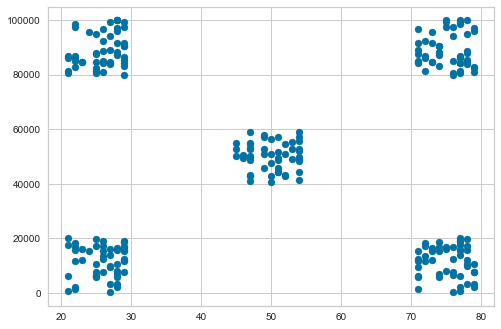

In [468]:
plt.scatter(df.Age, df.Networth);

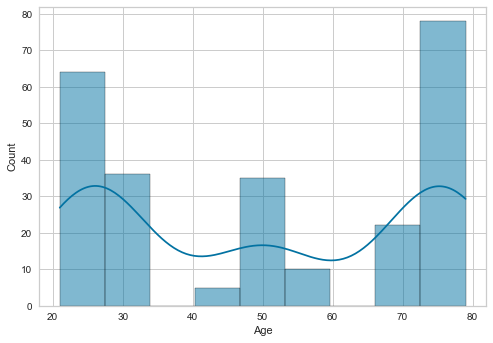

In [469]:
sns.histplot(df.Age, kde = True);

In [471]:
shapiro(df.Age)

ShapiroResult(statistic=0.8288943767547607, pvalue=6.64022161637589e-16)

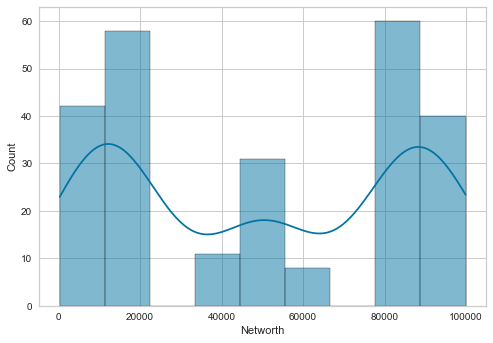

In [470]:
sns.histplot(df.Networth, kde = True);

In [472]:
shapiro(df.Networth)

ShapiroResult(statistic=0.8624314069747925, pvalue=3.5938469539718854e-14)

In [473]:
mmscale = MinMaxScaler()
#ssscale = StandardScaler()
mmscale.fit(df[['Networth']])
df[['Networth']] = mmscale.transform(df[['Networth']])
mmscale.fit(df[['Age']])
df[['Age']] = mmscale.transform(df[['Age']])


C:\Users\USER-PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


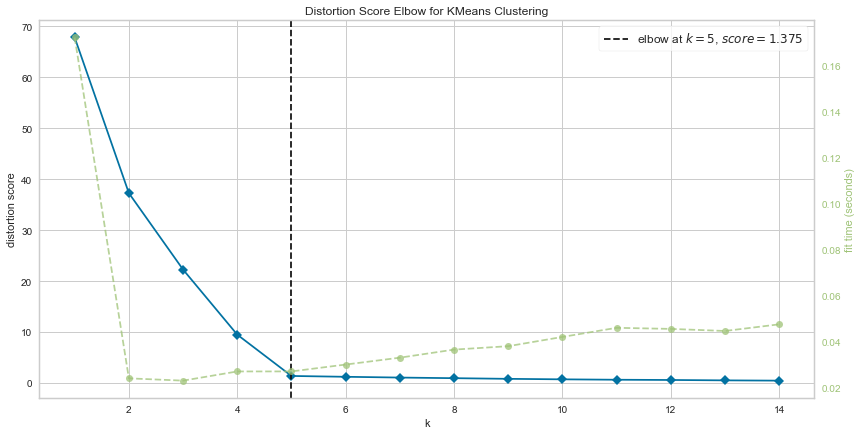

In [474]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15),size=(1000, 500))
visualizer.fit(df[['Age', 'Networth']])    
visualizer.show();        

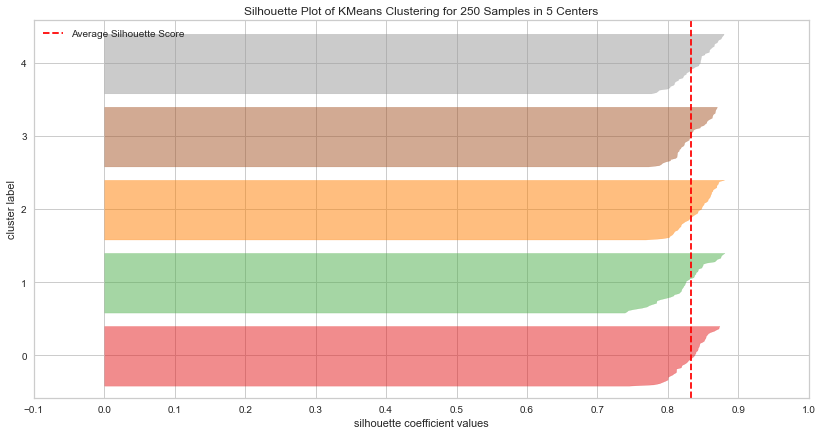

In [475]:
svk = KMeans(n_clusters = 5)
visualizer = SilhouetteVisualizer(svk,size=(1000, 500))
visualizer.fit(df[['Age', 'Networth']])    
visualizer.show();    

In [476]:
kmean = KMeans(n_clusters = 5)
cpredict = kmean.fit_predict(df[['Age', 'Networth']])
df['Group'] = cpredict+1
print("silhouette score :",silhouette_score(df[['Age', 'Networth']], kmean.labels_, metric='euclidean'))

silhouette score : 0.832144906425389


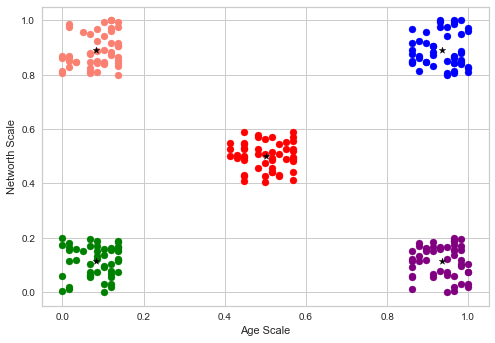

In [477]:
df1 = df[df.Group == 1]
df2 = df[df.Group == 2]
df3 = df[df.Group == 3]
df4 = df[df.Group == 4]
df5 = df[df.Group == 5]
plt.scatter(df1.Age, df1.Networth, color = 'green')
plt.scatter(df2.Age, df2.Networth, color = 'purple')
plt.scatter(df3.Age, df3.Networth, color = 'red')
plt.scatter(df4.Age, df4.Networth, color = 'blue')
plt.scatter(df5.Age, df5.Networth, color = 'salmon')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], marker = '*', color = 'black', label = 'centroid')
plt.xlabel('Age Scale')
plt.ylabel('Networth Scale')
plt.show();

In [ ]:
'''
#to create normally distributed array

start_value = 21
end_value = 90
size = 500
mean = (start_value + end_value) / 2
std_dev = (end_value - start_value) / 6
age = np.random.normal(mean, std_dev, size).round().astype(int)
'''


'''
#manual k-elbow

cRange = range(1,10)

sumsq = []

for i in cRange:
    kmean = KMeans(n_clusters = i)
    kmean.fit(df[['Age','Networth']])
    sumsq.append(kmean.inertia_)
    
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(cRange,sumsq)
plt.show();
'''